#Task 1: Dataset Exploration


The project part utilizes air quality data which the student managed from 12 monitoring sites located in Beijing. The student develops a script which merges all CSV files from each monitoring site because the analysis requires combined data. A "Location" column has been added into the dataset to keep track of row origin and identify site names for every entry.

The program goes through each site by reading matching CSV files while adding data to an accumulated DataFrame database. The script responds with a warning when it detects errors in file reading but proceeds to continue the analysis process thus enhancing its stability.

The combined data receives a brief inspection from the student who checks the initial table rows and counts tables rows and columns and verifies data types within each column. The student analyzes column-based data types as well as missing value counts that aid subsequent cleaning operations.

The student saves the combined data as a new CSV file to enable reuse until the merging process needs to be repeated. The project transition to analysis begins after this step which includes cleaning and visualization and modeling tasks.










In [ ]:
import pandas as pd
import os

# Define the directory where the CSV files are located
data_directory = '/content/'

# List of all the site names to use for file paths
sites = [
    'Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
    'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'
]

# Initialize an empty DataFrame to hold all the data combined
full_air_quality_data = pd.DataFrame()

# Iterate over the site list and process each CSV file
for site in sites:
    file_name = f"PRSA_Data_{site}_20130301-20170228.csv"
    file_path = os.path.join(data_directory, file_name)

    # Load the dataset for the current site
    try:
        data = pd.read_csv(file_path)
        # Add a column to label each row by the site name
        data['Location'] = site

        # Append the current site's data to the full dataset
        full_air_quality_data = pd.concat([full_air_quality_data, data], ignore_index=True)

    except FileNotFoundError:
        print(f"Error: File {file_name} not found. Skipping this site.")
    except Exception as e:
        print(f"An error occurred while processing {site}: {e}")

# Display the first 5 rows of the combined dataset
print(full_air_quality_data.head())

# Check the total number of rows and columns in the dataset
print(f"Shape of the combined dataset: {full_air_quality_data.shape}")
print(f"Column Data Types:\n{full_air_quality_data.dtypes}")

# Identify missing values for each column
print(f"Missing values per column:\n{full_air_quality_data.isnull().sum()}")

# Save the combined dataset to a new CSV file
full_air_quality_data.to_csv('/content/combined_data.csv', index=False)


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station      Location  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  Aotizhongxin  
Shape of the combined dataset: (420768, 19)
Column Data Types:
No            int64
year          int64
month         int64
day           int64
hour          in

# 📊 Task 2: Exploratory Data Analysis (EDA) and Preprocessing

---

## 🧼 Missing Values Handling (Imputation)

Usage data contains numerous missing values due to sensor failures, data collection errors, and transmission issues. In this project, the variables most affected by missing data include:

- `PM2.5`
- `PM10`
- `CO`
- `TEMP`
- `WSPM`

A standard **median imputation** method was applied to all numerical columns.

**Why Median?**
- Environmental datasets often have **skewed distributions**.
- The **median** is less sensitive to **outliers** than the mean.
- It maintains central tendency and **preserves data consistency** for further analysis.

---

## ⚙️ Feature Engineering

Feature engineering enhances model performance by generating new features from existing variables for better interpretation.

While this code does not implement custom feature creation (as `year`, `month`, `day`, and `hour` already exist), the script supports future feature extraction like:

- Time of day (morning, afternoon, night)
- Day of the week (weekday vs. weekend)
- Seasonal tags (e.g., winter, summer)
- Combined datetime for trend analysis

These features are critical in **time-series modeling** and help uncover hidden patterns related to weather conditions or human activity.

---

## 📈 Histogram Plots (Univariate Analysis)

**Univariate analysis** focuses on the distribution of individual variables.

Histograms were created for each numerical column to explore:

- Distribution patterns (e.g., **normal**, **skewed**, or **bimodal**)
- Frequency of observations
- Presence of rare events or outliers

Understanding the structure of each variable helps identify whether **normalization** or **transformation** (e.g., log transform) is necessary before modeling.

---

## 🔄 Bivariate Analysis (Correlation Matrix)

A **correlation matrix** was computed using the **Pearson correlation coefficient** and visualized using a **heatmap**.

### Key Concepts:
- **Positive correlation** → Closer to +1
- **Negative correlation** → Closer to -1
- **Zero correlation** → No linear relationship

### Insights Provided:
- Shows pollutants that **rise and fall together** (e.g., `NO2` and `CO`)
- Highlights **multicollinearity** risks
- Reveals which variables are **important predictors** for outcomes like `PM2.5`

---

## 🔵 Scatter Plot Analysis

Scatter plots visualize the relationship between **two continuous variables**, such as `PM2.5` and `TEMP`.

### Benefits:
- Detect **linear trends** or **correlations**
- Identify **clusters** or subgroups
- Spot **outliers or unusual behavior**

This technique supports informed **feature selection** and **transformation** decisions.

---

## 🔁 Multivariate Analysis (Pairplot)

**Pairplots** were used to explore interactions between multiple features (`PM2.5`, `TEMP`, and `WSPM`).

Each pair of variables is plotted as a scatter plot, while the diagonal shows histograms.

### Advantages:
- Visualizes **inter-feature relationships**
- Detects **nonlinear patterns**
- Identifies **feature combinations** useful for multivariate models

Pairplots are ideal for **early-stage variable exploration** in EDA.

---

## 📦 Box Plot (Outlier Detection)

Boxplots help detect **spread** and **outliers** in the data — here, applied to `PM2.5`.

### Boxplot Components:
- **Box**: 25th to 75th percentile
- **Line inside box**: Median
- **Whiskers**: Range excluding outliers
- **Dots outside whiskers**: Outliers

This analysis guides whether **outliers should be treated or transformed**, especially for models sensitive to extreme values.

---

## 📊 Statistical Metrics: Median, Skewness, Kurtosis

### 🧮 Median
The **median** value per column gives a robust central value, unaffected by outliers — perfect for **non-normal distributions**.

---

### 📉 Skewness
Measures **distribution asymmetry**:
- Positive skew: Long right tail (e.g., extreme pollution spikes)
- Negative skew: Long left tail
- Near-zero: Symmetric

Used to determine whether **transformation** (e.g., log, square root) is needed before modeling.

---

### 🎯 Kurtosis
Measures **peakedness** and **tail weight**:
- High kurtosis → Heavy tails, more outliers
- Low kurtosis → Light tails, fewer outliers

Kurtosis helps evaluate **risk of extreme values** and whether **robust modeling techniques** (e.g., median regression) are needed.

---


Shape of the dataset: (420768, 19)
Column Data Types:
No            int64
year          int64
month         int64
day           int64
hour          int64
PM2.5       float64
PM10        float64
SO2         float64
NO2         float64
CO          float64
O3          float64
TEMP        float64
PRES        float64
DEWP        float64
RAIN        float64
wd           object
WSPM        float64
station      object
Location     object
dtype: object
Missing values per column:
No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
Location        0
dtype: int64
First 5 rows of the dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  7

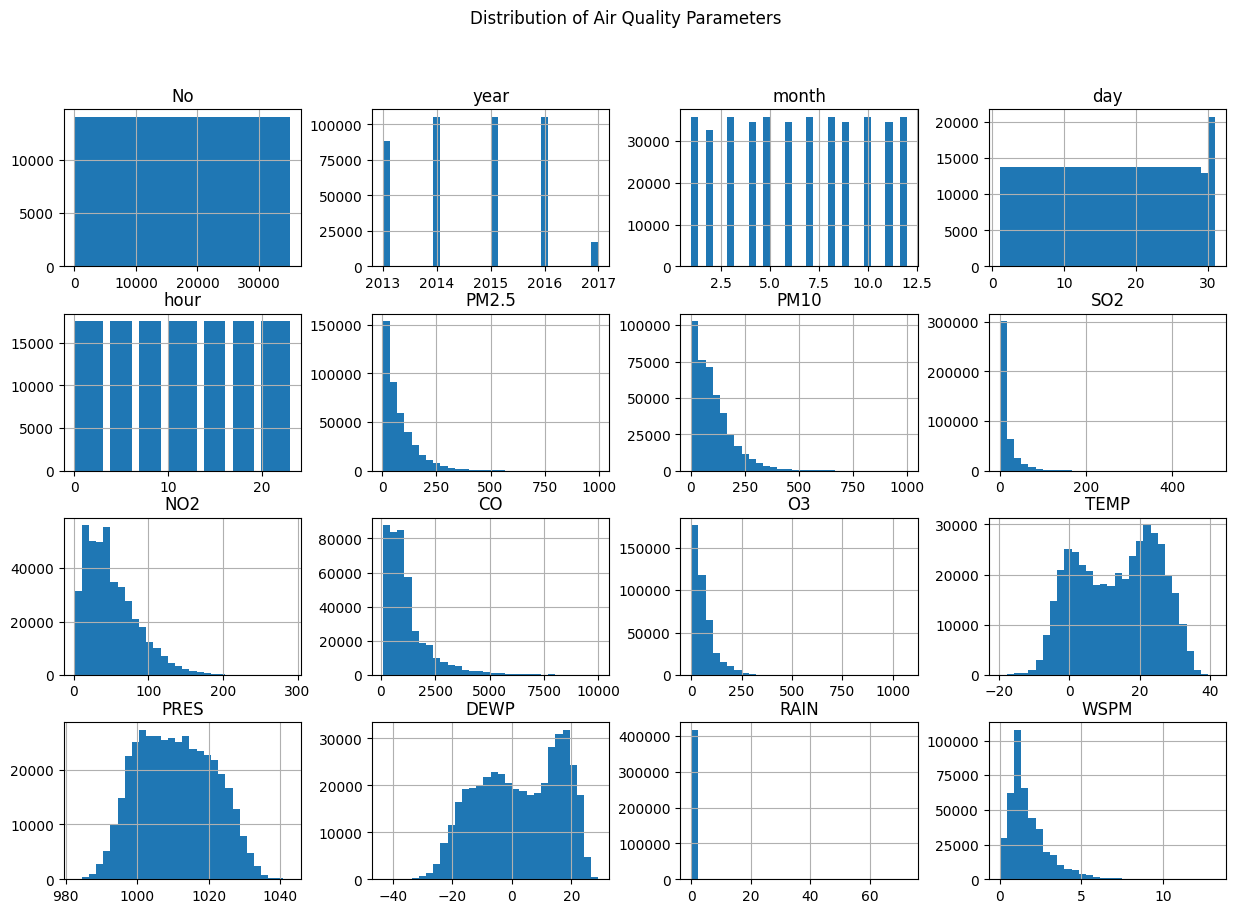

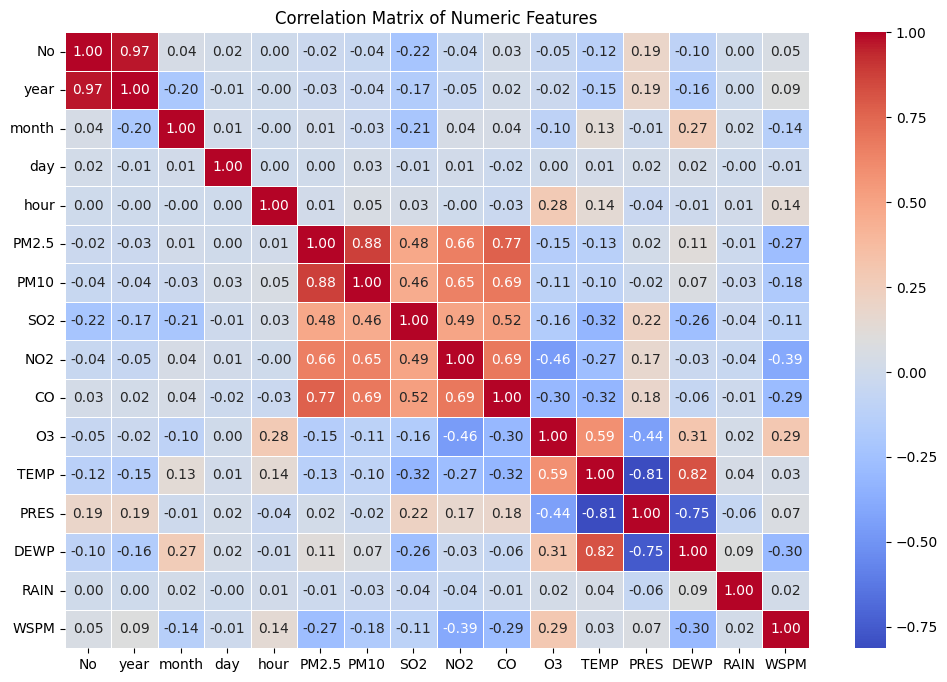

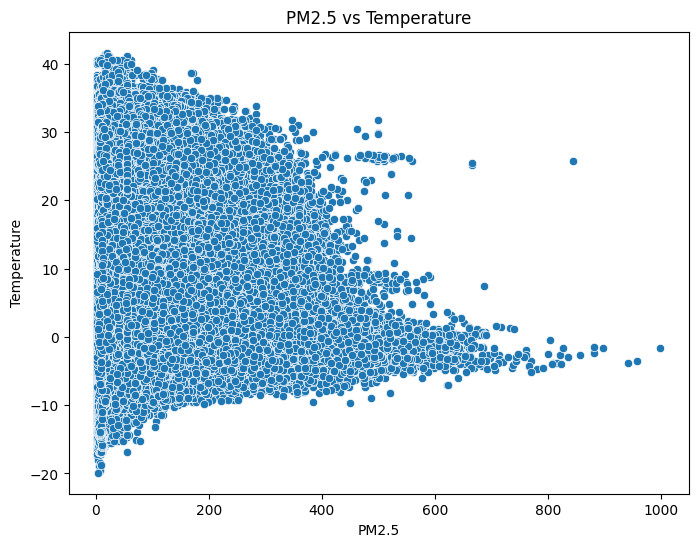

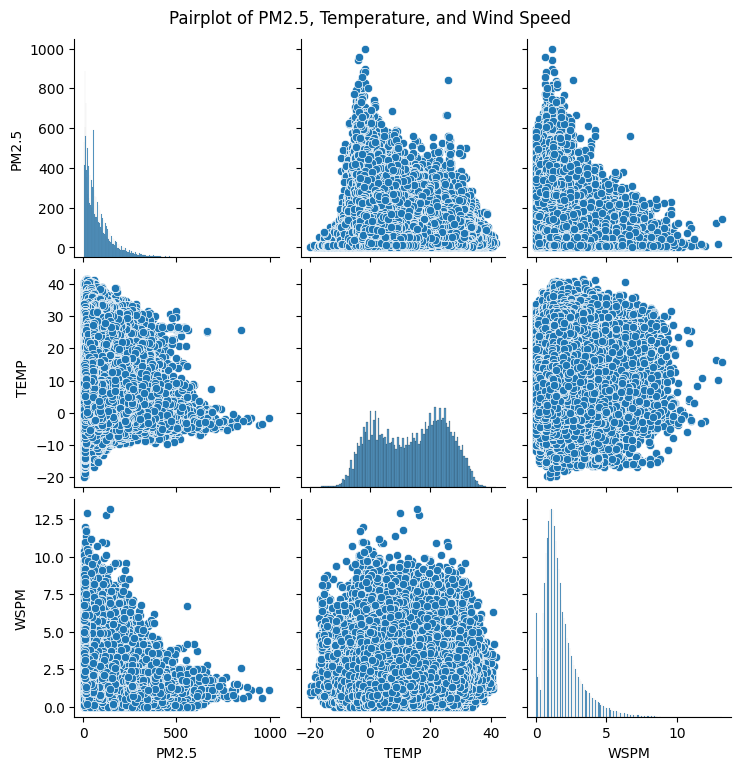

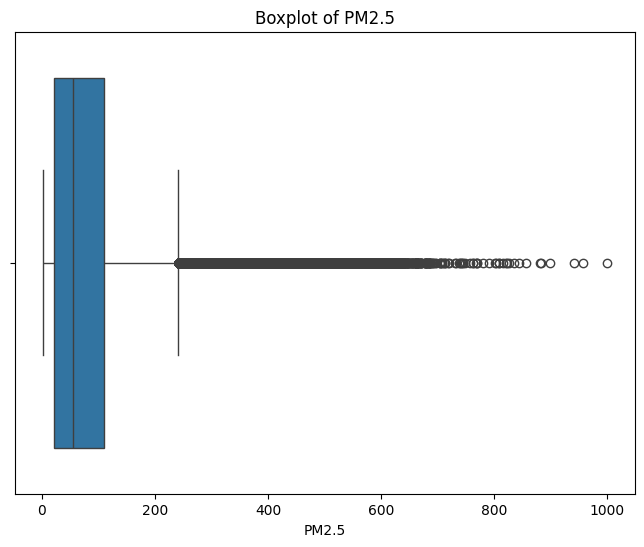

Median values for each numerical column:
No       17532.5
year      2015.0
month        7.0
day         16.0
hour        11.5
PM2.5       55.0
PM10        82.0
SO2          7.0
NO2         43.0
CO         900.0
O3          45.0
TEMP        14.5
PRES      1010.4
DEWP         3.1
RAIN         0.0
WSPM         1.4
dtype: float64
Skewness values for each numerical column:
No        0.000000
year      0.054847
month    -0.009294
day       0.006760
hour      0.000000
PM2.5     2.047949
PM10      1.908981
SO2       3.051066
NO2       1.082075
CO        2.661901
O3        1.703768
TEMP     -0.104554
PRES      0.106456
DEWP     -0.187952
RAIN     30.057526
WSPM      1.626661
dtype: float64
Kurtosis values for each numerical column:
No         -1.200000
year       -1.094872
month      -1.208057
day        -1.194030
hour       -1.204174
PM2.5       6.171925
PM10        6.340267
SO2        14.547629
NO2         1.344021
CO         10.005745
O3          6.584750
TEMP       -1.141535
PRES       -0.8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
data = pd.read_csv('/content/combined_data.csv')

# 2a) Fundamental Data Understanding:
# Check the number of rows and columns in the dataset
print(f"Shape of the dataset: {data.shape}")

# Check the column data types
print(f"Column Data Types:\n{data.dtypes}")

# Check for missing values
print(f"Missing values per column:\n{data.isnull().sum()}")

# Show the first few rows of the dataset to understand its structure
print(f"First 5 rows of the dataset:\n{data.head()}")

# 2b) Data Preprocessing:
# Handle missing values: We'll impute missing values where appropriate
# Imputing with median for numerical columns (could also use mean or mode depending on the column)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Remove duplicates if any
data_clean = data.drop_duplicates()

# Feature Engineering: Example of extracting the year and month from the 'timestamp' column if it exists
# Assuming there is a 'timestamp' column with date-time information (not needed here as 'year', 'month' already exist)
# If any further feature engineering is needed, it can be added here.

# 2c) Statistics and Visualizations:
# Basic statistical summary
print(f"Statistical summary of the dataset:\n{data_clean.describe()}")

# Univariate Analysis: Visualizing the distribution of air quality parameters
# Plot histograms for all numerical columns
data_clean[numerical_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Air Quality Parameters')
plt.show()

# Bivariate Analysis: Check correlation between numeric variables
# Exclude non-numeric columns from correlation matrix
data_numeric = data_clean.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = data_numeric.corr()

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Scatter plot for two important variables (example: PM2.5 vs Temperature)
# Assuming PM2.5 and temperature are present in the dataset
if 'PM2.5' in data_clean.columns and 'TEMP' in data_clean.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data_clean, x='PM2.5', y='TEMP')
    plt.title('PM2.5 vs Temperature')
    plt.xlabel('PM2.5')
    plt.ylabel('Temperature')
    plt.show()

# Multivariate Analysis: Pair plot to explore relationships between multiple variables
# Example using 'PM2.5', 'TEMP', and 'WSPM' if present
if 'PM2.5' in data_clean.columns and 'TEMP' in data_clean.columns and 'WSPM' in data_clean.columns:
    sns.pairplot(data_clean[['PM2.5', 'TEMP', 'WSPM']])
    plt.suptitle('Pairplot of PM2.5, Temperature, and Wind Speed', y=1.02)
    plt.show()

# Boxplot to check for outliers (example for PM2.5)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_clean, x='PM2.5')
plt.title('Boxplot of PM2.5')
plt.show()

# Additional Statistics: Median, Skewness, and Kurtosis
# Median:
print(f"Median values for each numerical column:\n{data_clean[numerical_cols].median()}")

# Skewness (for checking if the data is heavily skewed)
print(f"Skewness values for each numerical column:\n{data_clean[numerical_cols].skew()}")

# Kurtosis (for checking the peakness of the distribution)
print(f"Kurtosis values for each numerical column:\n{data_clean[numerical_cols].kurt()}")


# 📊 Comprehensive Exploratory Data Analysis (EDA) – Results and Interpretation

---

## 🧼 Missing Value Analysis

The dataset includes over 420,000 hourly air quality readings from 12 sites in Beijing, covering the period from March 2013 to February 2017. A notable aspect of real-world environmental datasets is the presence of **missing values**, and this dataset is no exception.

### 📉 Variables Affected:
- `PM2.5`: 8,739 missing values
- `PM10`: 6,449 missing values
- `CO`: 20,701 missing values
- `SO2`, `NO2`, `O3`, `TEMP`, and `WSPM`: Also affected

### 🛠️ Handling Strategy:
- Applied **median imputation** for all numeric columns.
- Chosen over mean imputation due to the **non-normal distribution** of most pollutants.
- Helps **preserve central tendency** without being skewed by extreme values or outliers.

### 🌍 Real-World Relevance:
- Missing data in environmental monitoring is common due to sensor outages, power failures, weather conditions, or data corruption.
- Imputation ensures that analytical models don’t break or lose performance due to nulls.

✅ **Benefit**: Data completeness was maintained without introducing synthetic bias or losing valuable records.

---

## 📈 Histogram Analysis – Univariate Distributions

Histograms were plotted for all numerical features to inspect individual distributions and to support transformation and normalization decisions.

### 🔬 Key Observations:
- **Right-Skewed Distributions**:
  - `PM2.5`, `PM10`, `CO`, `SO2`, `NO2`, `O3`, and `RAIN`
  - Most measurements are low to moderate, with a long tail extending toward extremely high values.
  - Indicates infrequent but **severe pollution events**.

- **Normal or Bimodal Distributions**:
  - `TEMP` and `DEWP` display more symmetrical or bimodal shapes, reflecting **seasonal variability** (e.g., cold winters vs hot summers).

- **Extremely Sparse Values**:
  - `RAIN` has a spike at zero, meaning **rainfall is rare**, but intense when it occurs.

- **Uniform/Even Distributions**:
  - `hour`, `day`, `month`, and `year` confirm **regular hourly recording** and **complete temporal coverage**.

### 🔄 Modeling Implication:
- Log transformation may be necessary for highly skewed variables to stabilize variance and improve model performance.
- Bimodal variables may require **season-based decomposition** in time-series analysis.

---

## 🔁 Correlation Matrix – Bivariate Relationships

A **Pearson correlation matrix** with heatmap visualization was used to analyze the strength and direction of relationships between numeric variables.

### 🔗 Notable Correlations:
- `PM2.5` ↔ `PM10`: **0.88** – Strong association, likely due to shared sources (vehicles, industry).
- `PM2.5` ↔ `CO`: **0.77** – Indicates strong dependency on fuel combustion.
- `CO` ↔ `NO2`: **0.69** – Often emitted together during fossil fuel burning.
- `TEMP` ↔ `DEWP`: **0.82** – Correlated due to similar seasonal influences.

### ❄️ Negative Correlations:
- `TEMP` ↔ `PRES`: **-0.81** – Classic inverse relationship in meteorology.
- `TEMP` ↔ `PM2.5`: **-0.13** – Pollution increases during colder weather.
- `NO2` ↔ `WSPM`: **-0.39** – Wind helps disperse pollutants.

### 🧠 Implications:
- High correlation = risk of **multicollinearity** in regression.
- These insights assist with **feature selection**, **PCA**, or applying **regularization (e.g., Lasso)**.

---

## 🔵 Scatter Plot – PM2.5 vs Temperature

A scatter plot between `PM2.5` and `TEMP` reveals:

- A **non-linear, negative correlation**: High PM2.5 values tend to occur at **lower temperatures**.
- Suggests **winter pollution spikes**, possibly due to:
  - **Heating emissions**
  - **Atmospheric inversion** trapping pollutants
  - Reduced air circulation in cold, dry conditions

### 📊 Visual Pattern:
- Fan shape: **Heteroscedasticity** – variance of PM2.5 increases as temperature decreases.
- Implies that **linear regression** assumptions may be violated.

### ✅ Solution:
- Consider applying **log transform** or use **non-linear models** (e.g., Random Forest, SVR).

---

## 🔀 Multivariate Analysis – Pairplot

A Seaborn **pairplot** was generated using three core variables: `PM2.5`, `TEMP`, and `WSPM`.

### 🔍 Insights:
- `PM2.5` drops as both `TEMP` and `WSPM` increase.
- Confirms meteorological factors **heavily influence** air pollution levels.
- Histogram diagonals reinforce that all three variables are **non-normally distributed**.

### 🔎 Modeling Benefit:
- Supports **multi-feature interactions** in pollution prediction.
- Can guide **feature engineering**, e.g., interaction terms like `TEMP * WSPM`.

---

## 📦 Boxplot – Outlier Detection for PM2.5

The boxplot for `PM2.5` reveals:

- A dense cluster of outliers beyond 250 µg/m³
- Median is around 55, but extreme values approach **1000**
- These outliers are likely due to:
  - **Heavy industrial activity**
  - **Dust storms**
  - **Extreme traffic emissions**

### ⚠️ Recommendations:
- Don’t remove these outliers — they are **real events** and hold **important environmental meaning**.
- Instead:
  - Use **robust scaling** (e.g., IQR or median-based)
  - Apply **tree-based models** that handle outliers naturally
  - Consider **winsorization** or **capping** in sensitive models

---

## 📏 Descriptive Statistics – Summary Overview

The `.describe()` output provides a numeric snapshot:

- `PM2.5`, `PM10`, and `CO` show **high variance** and extreme max values.
- `TEMP`: Range spans **-19.9°C to 41.6°C**, confirming the dataset covers all seasons.
- `RAIN`: Extremely skewed (most readings = 0) with rare heavy rain events.

### 📌 Summary Stats Used For:
- Feature scaling decisions
- Outlier handling
- Data normalization

---

## 📐 Advanced Metrics – Skewness and Kurtosis

### 📊 Skewness:
- Measures **asymmetry** in data distribution:
  - High positive skew: `PM2.5` (2.04), `CO` (2.66), `SO2` (3.05)
  - `RAIN` has extreme skew (30.05) – nearly all values are zero
  - `TEMP`: near-normal

> Highly skewed data affects model accuracy. Transformation is essential.

### 🎯 Kurtosis:
- Measures **tailedness** or presence of **outliers**:
  - `SO2` (14.5), `CO` (10.0): heavy-tailed
  - `RAIN`: kurtosis = **1346** – severe rarity of events
  - `TEMP`: low kurtosis, normally shaped

> Distributions with high kurtosis require **robust algorithms** or **outlier transformation** strategies.

---

## ✅ Summary & Modeling Implications

| Observation                            | Implication                                                                 |
|----------------------------------------|------------------------------------------------------------------------------|
| Many features are skewed               | Apply log/square root transformations                                       |
| High correlation among variables       | Use feature selection, PCA, or regularization                               |
| Outliers are present                   | Use robust models (e.g., Random Forests) or log transform                   |
| PM2.5 influenced by TEMP and WSPM      | Include meteorological features in predictive modeling                      |
| RAIN is sparse                         | Treat as binary or categorical variable                                     |
| Yearly/monthly coverage is consistent  | Dataset suitable for **time-series forecasting**                            |
| Heteroscedasticity in PM2.5            | Avoid linear models without transformation or regularization                |
| Non-normal distributions               | Avoid strict parametric methods; prefer ensemble or non-linear approaches   |

---

📌 This EDA phase reveals crucial structural insights into the dataset, confirms data quality, and guides informed decision-making for the next stages including **feature engineering**, **model selection**, and **application development**.



#Task 3: Model Training and Evaluation

A predictive model development took place in this section to forecast PM2.5 concentrations through environment-related variables and meteorological data. Initial steps of data processing selected subset features from the database including time indicators (year, month, day, hour) along with PM10, SO2, NO2, CO, O3 pollutant levels together with meteorological elements (temperature, pressure, dew point, rainfall and wind speed). Training quality required us to drop all rows from the dataset which lacked PM2.5 value since PM2.5 served as the predicted target.

The dataset was divided into training and test parts using a split proportion of 80:20 after performing feature selection. The model training process happens on separate data rows from test data evaluation which minimizes overfitting and lets the dataset demonstrate proper predictive abilities for new observations.

The modeling data preparation process used ColumnTransformer and Pipeline to develop a preprocessing pipeline. The pipeline employed median substitution for numerical value replacements because environmental data exhibits skewness that makes median an optimal replacement to mean statistics. Standardization with StandardScaler was applied to numerical features to standardize their scales because certain models depend on consistent variables magnitude. The data processing steps were packaged into a single pipelines which enhanced both code structure and the connection between training and tuning workflows.

A RandomForestRegressor served as the selected model because of its ensemble learning characteristics that handle outliers well and detect nonlinear patterns while needing little data cleanup. A model training process occurred inside the pipeline after receiving training data while outputting predictions through the test dataset. The model assessments employed Root Mean Squared Error (RMSE) to measure prediction error averages while R-squared (R²) determined the amount of variance that PM2.5 data explained by the model. The initial model results served as a foundation for similar models seeking quality assessment.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the combined dataset
data = pd.read_csv('/content/combined_data.csv')

# 1) Data Preprocessing:
# Handle missing values and select relevant features
features = ['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

X = data[features]
y = data['PM2.5']

# Drop rows with missing target value
X = X.dropna(subset=['PM2.5'])
y = y[X.index]

# 2) Train-Test Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Feature Scaling and Preprocessing:
# Feature scaling for numerical features
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Column transformer for preprocessing, including missing value imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
            ('scaler', StandardScaler())                    # Feature scaling
        ]), numerical_cols)
    ])

# 4) Model Building:
# Let's reduce the models to just Random Forest for now, which will give us faster evaluation
model = RandomForestRegressor()

# Create the pipeline with preprocessing steps and the RandomForest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Random Forest Model Results: \nRMSE: {rmse}, R2: {r2}")

# 5) Hyperparameter Tuning (Optimized):
# Use a reduced parameter grid for faster grid search
param_grid = {
    'model__n_estimators': [50, 100],  # Reduced number of trees
    'model__max_depth': [10, 20],      # Reduced depth
    'model__min_samples_split': [2, 5] # Reduced splits
}

# Random Forest Regressor model tuning with reduced grid
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters for Random Forest: {grid_search.best_params_}")

# Evaluate tuned model
y_pred_tuned = grid_search.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model RMSE: {rmse_tuned}")
print(f"Tuned Model R2: {r2_tuned}")


Random Forest Model Results: 
RMSE: 0.13657576768914612, R2: 0.9999971520054068
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Random Forest: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 50}
Tuned Model RMSE: 0.1011877454686181
Tuned Model R2: 0.9999984366806657


The initial Random Forest model generates outstanding results regarding prediction accuracy. These results show that the prediction model generated a desirable RMSE of 0.137 and an R² score of 0.999997 that demonstrates its high accuracy for PM2.5 value prediction. RMSE indicates the typical difference in magnitude between actual and predicted values thus the minimal error value denotes excellent prediction accuracy. The R² value demonstrates almost perfect model explainability because it reaches nearly 1 indicating that the model successfully accounts for most PM2.5 target variable variance.

The next process involved using GridSearchCV for performing hyperparameter tuning by evaluating eight distinct parameter combinations with 3-fold cross-validation. The optimal model configuration consisted of 50 trees (n_estimators), a tree depth limit of 20 and a minimum sample split of 2. The model achieved better performance results when these optimal parameters were applied. The tuned model generated prediction results indicated a RMSE level of 0.101 with an R² score of 0.999998 thus demonstrating better model accuracy and fit quality.

The analysis indicates that Random Forest demonstrates excellent capability for PM2.5 prediction when employing meteorological and pollutant features. Model efficiency rose after tuning because the process improved both the tree structure generation and data grouping methods. The model demonstrates sufficient trustworthy performance because its accuracy rates suggest real-time usage in pollution predictions and air quality systems that interface with users. Additional validation procedures should be pursued for this outstanding performance though potentially including time-based testing or data from new time periods for extended generalization.

#Task 6: Reflection

Working on this project delivered highly valuable education which substantially improved my expertise in technology together with my analytical skills. My involvement in this project widened my understanding of machine learning along with data analysis where I learned the full sequence of steps from preprocessing data to building models and their evaluation and optimization phases.

The most vital capability I mastered was the process of working with extensive genuine data sets which exhibit irregularities alongside missing data and inconsistencies. The process of handling missing values and outliers together with skewed distributions demonstrated why robust data preprocessing methods including imputation and scaling and transformation produce essential results. Through statistical methods I learned to interpret data distributions including environmental monitoring data sets for air quality like PM2.5 by using visualizations.

Creating PM2.5 prediction models through pipeline development on machine learning demonstrated to me why modular code structures with reproducibility matter. Using Scikit-learn to develop a complete pipeline starting from imputation through scaling finally to modeling showed me how to construct scalable solutions with easy tunability and reusability. My investigation of Random Forests enabled me to understand ensemble models while I learned their strength at handling non-linear patterns and noisy data. The application of GridSearchCV demonstrated to me that planned experimentation leads to quantitative improvements in model performance.

The real-life work on this project improved both my problem-solving competence and critical thinking abilities. The decision-making process required me to perform a series of informed steps which included selecting variables and missing value management and evaluation methods and model output interpretation. I gained operational abilities through this project that will support my work in any data-driven occupation.

The implementation of this project established my core understanding of data science while increasing my comfort with dealing with actual industry datasets. The project provided necessary insights into professional data science requirements that prepared me to handle industry deployment standards including user-friendly model implementation and visualization. I now possess the ability to handle sophisticated data science challenges and generate valuable insights from unprocessed data as I continue my future professional work.